In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [3]:
airlines=pd.read_excel("A:/Data Science/assignments/Clustering/EastWestAirlines.xlsx",sheet_name='data')

In [4]:
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
airlines=airlines.iloc[:,1:]

In [10]:
scaled=MinMaxScaler()
scaled_data=scaled.fit_transform(airlines)
scaled_data=pd.DataFrame(scaled_data,columns=['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'])

In [12]:
scaled_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [60]:
scaled_data.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494,-0.307133
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256,-0.024077
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457,-0.693987
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332,0.033790
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484,-0.038145
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506,-0.498531
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893,-0.473417
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715,-0.073043
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909,-0.081285
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121,-0.190819


In [79]:
scaled_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [80]:
k_range=range(1,10)
SSE=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(scaled_data)
    SSE.append(km.inertia_)

In [81]:
SSE

[1830.7932128584112,
 823.6756984125207,
 625.1684881570719,
 436.7088576193262,
 348.94332172541374,
 315.1502077200142,
 287.7292539940175,
 263.26027166360996,
 250.91479563761243]

Text(0,0.5,'SSE')

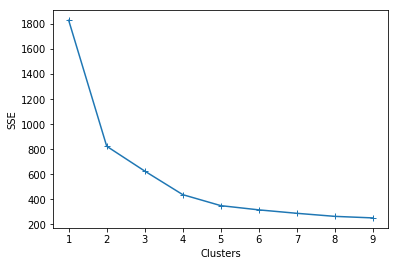

In [84]:
plt.plot(k_range,SSE,marker='+')
plt.xlabel('Clusters')
plt.ylabel('SSE')

In [86]:
#Selecting 2 clusters from the above scree plot
model=KMeans(n_clusters=2)
model.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [89]:
model.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [90]:
airlines['Cluster']=model.labels_

In [92]:
airlines.Cluster.value_counts()

1    2518
0    1481
Name: Cluster, dtype: int64

In [ ]:
#We have two clusters her 0 and 1.